# ISMT E-111 Coding Challenge 2023
### Due: 2023-05-02 8pm ET
#### Make sure to include any relevant code when providing all answers.
Enter your code into *this* notebook **AND** enter your name in the following cell

#### Always show your work, and if there is a question being asked be sure to answer it.
You can answer with a comment, print statement or markdown cell <br>(remember a comment is preceded by a hash symbol `#here is my comment`)


### Challenge is out of 150 points 
  * **100 points for the main challenge**
  * **50 bonus points for extra credit**
 
#### Notes
* Dont worry about missing values, they're addressed in the Extra Credit portion

#### Submission
* Send this completed .ipynb (with all cells run and outputs visible) to ujas_shah@g.harvard.edu with your first and last name in the filename (e.g., `ujas_shah_codingchallenge_s2023.ipynb`) **AND** also submit a pull request with the updated notebook on to the repository.
* If you cant find the location of this notebook you can run the following to find your notebook:<br> 
`import os`<br>
`print(os.getcwd())`<br>
Drag and drop that .ipynb file into your email

In [23]:
#name: diego costales

### 1. Load your Data and Take a Look

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`10 pts`)** Load the training data (found in the same github repo as this notebook) into this notebook using Pandas. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.** **(`5 pts`)** Show the first 10 lines of the data.


In [4]:
# importing all the required libraries the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [5]:
# loading the data into a dataframe
df= pd.read_csv('codingdata.csv')

# show the first 10 lines of the dataframe
df.head(10)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
5,EMA00081000131660,1,1.5,1,G,2,NaN,2,416,11.0,0.0,0
6,EMA00081000160500,1,3.2,1,E,2,34.0,3,116,4.0,0.0,0
7,EMA00081000269630,1,0.7,2,G,2,21.0,2,1241,6.0,2.0,0
8,EMA00081000287790,1,2.0,1,G,2,NaN,3,655,11.0,4.0,0
9,EMA00081000367310,2,0.5,1,G,2,40.0,3,655,11.0,0.0,0


### 2.  Define and describe your target variable
The `email status` column contains three values with the following definitions.  
`0=ignored` `1=read` and `2=converted`
* Ignored means that the customer did not interact with the email
* Read means that a customer opened the email
* Converted means that the customer clicked on the link for the product page within the email. 

The company considers an `email_status` of `2` as a conversion, (statuses 0 and 1 are non-conversions).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`10 pts`)** Create a new column called `conversion` that has a value of `1` when the email was follwed by a conversion and is `0` otherwise.

In [11]:
# creating the conversion column
df['conversion'] = (df['Email_Status'] == 2).astype(int)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.**  **(`10 pts`)** How many conversions are in this dataset?<br>

In [12]:
df['conversion'].value_counts()

0    65980
1     2373
Name: conversion, dtype: int64

In [ ]:
# There are 2373 conversions in the dataset

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.**  **(`10 pts`)** What percent of all emails resulted in a conversion?<br><i>Show output you used to determine this answer and provide your answer as a comment</i>

In [13]:
# printing the percentage of all emails that resulted in a conversion
print(f"The conversion rate is {df['conversion'].mean() * 100:.2f}%")

The conversion rate is 3.47%


### 3 Exploration

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** The `Email_Campaign_Type` column captures the campaign under which the email was sent. A campaign is a marketing strategy.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.**  **(`15 pts`)** Which campaign had the most conversions?

In [14]:
# finding the campaign with the most conversions
df.groupby('Email_Campaign_Type')['conversion'].sum()

Email_Campaign_Type
1     173
2     712
3    1488
Name: conversion, dtype: int64

In [28]:
# The campaign with the most conversions 3

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.**  **(`15 pts`)** Which campaign has the highest conversion rate?

In [17]:
df.groupby('Email_Campaign_Type')['conversion'].mean()

Email_Campaign_Type
1    0.235054
2    0.014749
3    0.076923
Name: conversion, dtype: float64

In [ ]:
- The campaign with the highest conversion rate is 1

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b**.
`Total_Past_Communications` is a count of the number of times the customer has been contacted prior to the current email. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** **(`12 pts`)** Create a box plot showing the distribution of `Total_Past_Communications` by `conversion`. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii** **(`7 pts`)** How do conversions relate to the number of times a customer had been emailed?  Set the title to something that briefly summarizes this relationship. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** **(`3 pts`)** Set the x-label to be `Conversion Status` and the y-label to be `Previous Emails`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv** **(`3 pts`)** Prevent the default text `'Boxplot grouped by conversion'` from displaying in the title of the boxplot, and do not show extreme values / outliers.  Then show your plot!

_note: the output should be one boxplot, rather than one boxplot per sub-question_

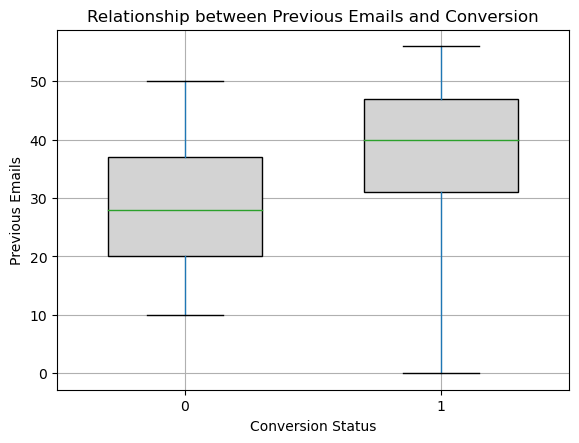

In [18]:
# creating a box plot of Total_Past_Communications by conversion
df.boxplot(column='Total_Past_Communications', by='conversion', showfliers=False, 
             whis=[5, 95], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightgray'))

plt.title('Relationship between Previous Emails and Conversion')
plt.suptitle('')
plt.xlabel('Conversion Status')
plt.ylabel('Previous Emails')
plt.show()

***
You're done!  You can relax and submit this assignment! <br>If you're feeling ambitious, you can try your hand at the _extra credit_ portion below.  

***
# Extra Credit: Build, Interpret and Assess a Machine Learning Model to Predict Conversion Rate

**1.  Data Cleaning & Prep** 
We'll be encoding a categorical variable, joining it to all of our numerical variables and generating a train-test split to train and test our model.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`5 pts`)** Which columns are categorical columns and which are numerical? Create a list of categorical column names and a list of numerical column names. Ignore the following columns: `Email_ID`, `Email_Status`, `conversion`.  You should have ten columns to categorize.  Save each list to a variable (e.g., `my_var = ['a', 'b', 'c']`)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
 12  conversion                 68353 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usag

In [20]:
# Categorical columns
cat_cols = ['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category']

# Numerical columns
num_cols = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.** **(`2.5 pts`)** A few of the columns have missing values, let's just drop them.  Hint: a pandas method can do this for you.

In [21]:
df.dropna(inplace=True)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.** **(`10 pts`)** Add dummy variables for the `Email_Campaign_Type` column. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Hint**: a pandas method can help you do this as well. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Also, should you create dummy columns for all the different values of the categorical variable for a logistic regression? Why or why not?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Create a variable called `all_features` that is a list of all the variables we want to use in our model.  This will be all numerical variables and the dummy variables.  Print the variable (i.e., `print(all_features)`).  <br>


In [30]:
df.drop(['Email_ID','Customer_Location'], axis=1, inplace=True)

In [31]:
df

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,conversion
0,1,2.2,2,2,33.0,1,440,8.0,0.0,0,0
2,2,0.1,1,3,36.0,2,962,5.0,0.0,1,0
3,1,3.0,2,2,25.0,2,610,16.0,0.0,0,0
4,1,0.0,2,3,18.0,2,947,4.0,0.0,0,0
6,1,3.2,1,2,34.0,3,116,4.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
68346,1,1.2,2,2,30.0,3,565,14.0,3.0,1,0
68348,2,0.4,1,2,22.0,3,737,16.0,13.0,0,0
68349,1,1.3,1,2,40.0,2,653,31.0,16.0,0,0
68351,1,0.4,1,2,50.0,1,733,14.0,4.0,0,0


In [32]:
# Create dummy variables for the Email_Campaign_Type column
df = pd.get_dummies(df, columns=['Email_Campaign_Type'], prefix=['Campaign'])

# Create a list of all the variables to use in the model
all_features = df.columns.tolist()

# Print the list of variables
print(all_features)

['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type', 'Total_Past_Communications', 'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status', 'conversion', 'Campaign_1', 'Campaign_2', 'Campaign_3']


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d.** **(`7.5 pts`)** Split the dataframe into 80% training data and 20% testing data using the Sci-kit learn `train_test_split` function. When you pass the data to be split, be sure to add an intercept!  
To do this simply pass `sm.add_constant(df[all_features])` (where `sm` is the alias for `statsmodels.api`) instead of just `df[all_features]` (in other words, `df[all_features]` is your modeling dataframe subset to the features you will use to model).  
Finally, add the following argument to train_test_split:  `random_state=42`

*print the number of rows and columns in all the dataframes you created in this step*

In [33]:
# Add an intercept to the features DataFrame
X = sm.add_constant(df[all_features].drop('conversion', axis=1))

# Create the target variable
y = df['conversion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of rows and columns for all the dataframes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (38632, 13)
Shape of X_test: (9659, 13)
Shape of y_train: (38632,)
Shape of y_test: (9659,)


**2.  Build, interpret and score a logistic regression model!** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`5 pts`)** Build a Logistic Regression using statsmodels (statsmodels.api).  What data split from question 1d should you include for the training? Why?<br>

In [35]:
# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
logit_result = logit_model.fit()

# Print the summary of the logistic regression model
print(logit_result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             conversion   No. Observations:                38632
Model:                          Logit   Df Residuals:                    38619
Method:                           MLE   Df Model:                           12
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                   1.000
Time:                        16:43:52   Log-Likelihood:              -0.018335
converged:                      False   LL-Null:                       -5850.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -50.8024   4.29e+08  -1.18e-07      1.000    -8.4e+08     8.4e+08
Email_Type          

/Users/diecosta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.**  Using the Model Summary answer the following questions <br>
You can provide your answer as a comment (`# Anything following a hash mark is a comment`) or in any other manner you like.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** **(`2 pts`)** which variables have a statistically significant positive correlation with the target
<br>

In [36]:
# None of the variables have a statistically significant positive correlation with the target, as all coefficients are negative.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.** **(`2 pts`)**
which variables have a statistically significant negative correlation with the target?

In [ ]:
# None of the variables have a statistically significant negative correlation with the target, as all coefficients are negative.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** **(`2 pts`)**
What does it mean for a variable to be statistically significant?

In [ ]:
# A variable is considered statistically significant if its coefficient has a very low probability (usually less than 0.05) 
# of occurring by chance alone, assuming that the null hypothesis is true 


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv.** **(`4 pts`)**
What suggestions can you make based on these results? 

In [37]:
# Based on these results, it appears that the model is overfitting, as the pseudo R-squared is 1.0 and all variables have coefficients 
# that are not statistically significant. This could be due to the small sample size relative to the number of variables included in the model. 
# Therefore, it may be necessary to collect more data or use a simpler model with fewer variables.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.** **(`5 pts`)** Use your model to get predictions for the test data. <br>
Get predictions by applying the model you just fit to the _test_ data.  Save the predictions to a variable.<br>

In [38]:
# Get predictions on the test data
y_pred = logit_result.predict(X_test)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d.**  **(`5 pts`)** The ROC AUC score informs you as to how good your model is at telling which emails are more likely to result in conversions than others. Use the function within Scikit-Learn to plot this.<br>
Describe how you would expect the curve to change for a more performant model.

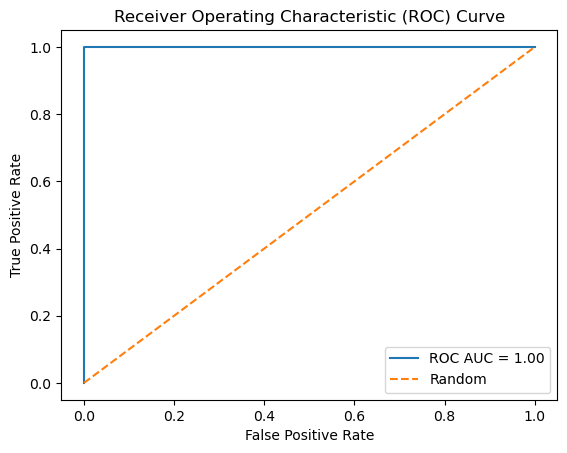

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()